In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/d068711/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
df = pd.read_csv('data/avatar.csv', engine='python')

In [4]:
df.head(5)

,Unnamed: 0,id,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
0,1,1,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
1,2,2,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
2,3,3,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
3,4,4,Water,1,The Boy in the Iceberg,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
4,5,5,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1


In [5]:
len(df)

13385

### Basic exploration

In [6]:
#Number of Books
df['book'].value_counts()

Water    4620
Earth    4412
Fire     4353
Name: book, dtype: int64

In [7]:
# Characters in each Book
df.groupby('book')['character'].unique()

book
Earth    [Scene Description, Katara, Aang, Pakku, Iroh,...
Fire     [Scene Description, Aang, Pipsqueak, Toph, Kat...
Water    [Katara, Scene Description, Sokka, Zuko, Iroh,...
Name: character, dtype: object

In [8]:
# Number of unique characters in each Book
df.groupby('book')['character'].nunique()

book
Earth    171
Fire     155
Water    132
Name: character, dtype: int64

In [9]:
# Number of lines from each character in each Book
df.groupby('book')['character'].value_counts()

book   character        
Earth  Scene Description    1226
       Sokka                 499
       Aang                  492
       Katara                413
       Toph                  242
                            ... 
Water  Spectators              1
       Strange Man             1
       Together                1
       Tribal man              1
       Village kids            1
Name: character, Length: 458, dtype: int64

In [10]:
# Filtering character="Scene Description" as words spoken by character (character_words) there are NaN
df = df[df['character'] != 'Scene Description']
len(df)

9992

In [11]:
# filtering out non-top characters
top_10_characters = df['character'].value_counts(ascending=False).index[:10].tolist()
df_top_characters = df[df['character'].isin(top_10_characters)]
df_top_characters = df_top_characters[['character', 'character_words']]

### Computing sentiment score per sentence using VADER (Valence Aware Dictionary for Sentiment Reasoning)
VADER is a model used for text sentiment analysis that is sensitive to polarity (positive/neutral/negative) and intensity of emotion. It can be applied directly to unlabelled text. Also, it outputs 'compound' by normalizing the polarity score.

In [12]:
sid = SentimentIntensityAnalyzer()
df_top_characters.reset_index(inplace=True, drop=True)
df_top_characters[['neg', 'neu', 'pos', 'compound']] = df_top_characters['character_words'].apply(sid.polarity_scores).apply(pd.Series)
df_top_characters

,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


### Computing sentiment of each character

In [13]:
# sentiment score for each character (mean)
df_top_characters = df_top_characters.groupby('character').mean().round(3).sort_values(by='pos', ascending=True)
df_top_characters.reset_index(inplace=True)
df_top_characters

,character,neg,neu,pos,compound
0,Zhao,0.135,0.753,0.112,-0.039
1,Zuko,0.100,0.789,0.112,0.026
2,Sokka,0.097,0.789,0.115,0.023
3,Katara,0.091,0.787,0.122,0.045
4,Azula,0.090,0.784,0.127,0.080
5,Suki,0.090,0.783,0.127,0.086
6,Jet,0.090,0.777,0.133,0.063
7,Toph,0.084,0.776,0.140,0.074
8,Aang,0.075,0.782,0.143,0.083
9,Iroh,0.077,0.754,0.169,0.165


## Plotting sentiment

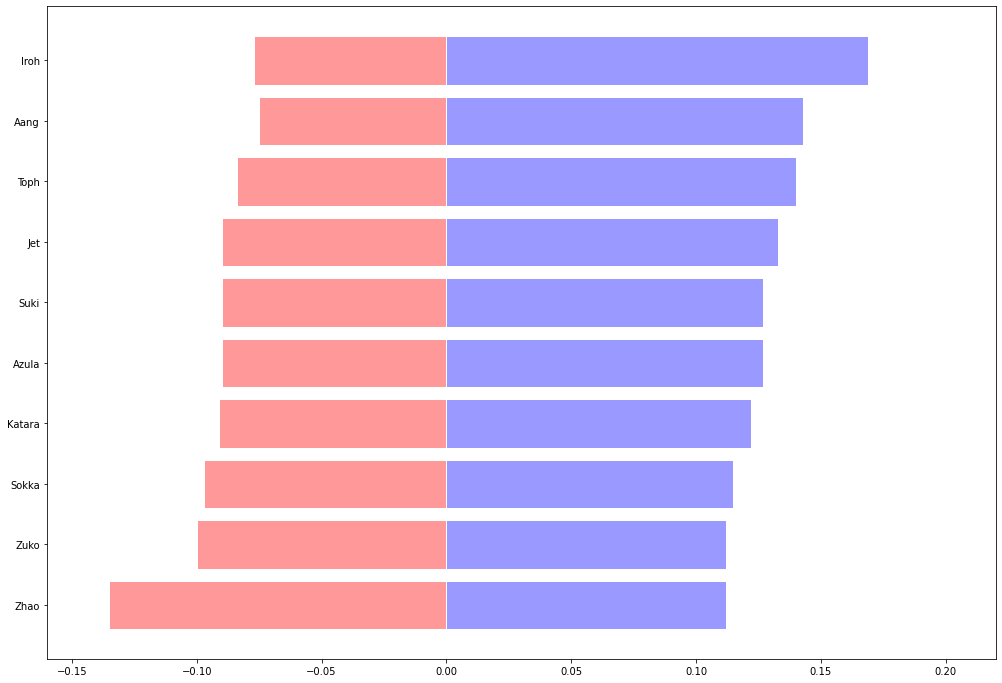

In [14]:
# preparing data
X = np.arange(len(df_top_characters['pos']))

#bar plot
fig = plt.figure(figsize = (17, 12))
plt.barh(X, df_top_characters['pos'], facecolor='#9999ff', edgecolor='white')
plt.barh(X, -df_top_characters['neg'], facecolor='#ff9999', edgecolor='white')
plt.xlim([-.16,.22])
plt.yticks(ticks=X, labels=df_top_characters['character'], rotation='0')
plt.show()